# Web Scrapping

## Importing libraries

In [141]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import StaleElementReferenceException

import time
import pandas as pd


## Extracting car links from a Particular Location



In [112]:
def find_all_carlinks(driver,totalCars):
    """
    @driver -- webdriver for the page

    @totalCars -- integer for total cars available on that page

    Details: Makes all the car container elements available on the page by scrolling down. Once all car 
    cards loaded on page then make list of links of car detial page and return it.
    """
    while True:
        cars = driver.find_elements(By.CLASS_NAME, "styles_carCardWrapper__sXLIp")
        print(f"Loaded: {len(cars)} / {totalCars}")
    
        if len(cars) == totalCars:
            print("All cars loaded")
            break
        driver.execute_script("window.scrollBy(0, 500);")
        time.sleep(2)  # wait before checking again
        
    # Extract all car card URLs
    car_links = [car.get_attribute("href") for car in cars]
    return car_links

## Extracting Car Details


In [138]:
def get_car_details(driver):
    """
    @driver : web-driver for the page

    Return car_dict for this particular car after getting information from web page
    """
    
    car_dict = {
                'Name' : '',
                'Price' : '',
                'Fuel Type':'',
                'Transmission': '',
                'Kilometers Driven' : '',
                'Make Year': '',
                'Owner': '',
                'location' : ''
        }
    # Car Name
    car_info = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".styles_sections__6sMMb h1")))
    car_name = car_info.text

    # Car Price
    car_price_element = WebDriverWait(driver, 30).until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div.styles_price__3yE9i p.sc-braxZu.hhzsvw')))
    car_price = car_price_element.text

    # Car Location
    car_location_element = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.CSS_SELECTOR,'div.styles_hubLocation__AOuo3.shrinkOnTouch p')))
    car_loc = car_location_element.text
    
    car_dict['Name']=car_name
    car_dict['Price']=car_price
    car_dict['location']=car_loc

    ## Other Car Details
    car_info = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.CSS_SELECTOR,'#CATALOG_CDP_KNOW_YOUR_CAR div.styles_itemBody__IMfct')))
    car_info = driver.find_elements(By.CSS_SELECTOR,'div.styles_itemBody__IMfct')
    
    for info in car_info:    
        text = info.find_element(By.CSS_SELECTOR,"p.sc-braxZu.jjIUAi").text
        if text=='Make year':
            car_dict['Make Year']=info.find_element(By.CSS_SELECTOR,"p.sc-braxZu.kjFjan").text
        if text == 'Fuel':
            car_dict['Fuel Type']=info.find_element(By.CSS_SELECTOR,"p.sc-braxZu.kjFjan").text
        if text == 'KM driven':
            car_dict['Kilometers Driven']=info.find_element(By.CSS_SELECTOR,"p.sc-braxZu.kjFjan").text
        if text == 'Transmission':
            car_dict['Transmission']=info.find_element(By.CSS_SELECTOR,"p.sc-braxZu.kjFjan").text
        if text == 'Ownership':
             car_dict['Owner']=info.find_element(By.CSS_SELECTOR,"p.sc-braxZu.kjFjan").text

    return car_dict
    

## For each link in car_links get_car_details

@ driver -- webdriver of the page

@car_links -- list of car page links


For each link in the car_links visits the page gets the required car details and returns list of car detial dictionaries. Makes Three attempts for a 
car link if StaleElementReferenceException happens.

In [137]:
def get_car_info(driver, car_links):
    """
    @ driver -- webdriver of the page

    @car_links -- list of car detail page links

    For each link in the car_links visits the page gets the required car 
    details and returns list of car detial dictionaries. Makes Three attempts for a 
    car link if StaleElementReferenceException happens.
    """
    cars_details = []
    for index,link in  enumerate(car_links):
        driver.get(link)
        for attempt in range(3):
            try:
                car_dict = get_car_details(driver)
                cars_details.append(car_dict)
                print(f'Car {index+1} Details Captured')
                break
        
            except StaleElementReferenceException:
                print(f"Stale element on attempt {attempt + 1}, retrying...")

    return cars_details 

## Getting All car links from 3 Locations.

Set options for web driver and get car detail page links for 3 locations

In [122]:


options = Options()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--disable-gpu")  # Optional: speeds up rendering
options.add_argument("--window-size=1920,1080")  # Optional: ensures full page loads

# Setup Chrome
driver = webdriver.Chrome(options=options)
driver.maximize_window()

location_pages_url = {
    'Bangalore':'https://www.cars24.com/buy-used-renault-cars-bangalore/', # bangalore renault used car page 
    'Mumbai':'https://www.cars24.com/buy-used-renault-cars-mumbai/', # mumbai renault used car page
    'Hyderabad':'https://www.cars24.com/buy-used-renault-cars-hyderabad/?sort=bestmatch&serveWarrantyCount=true&listingSource=Homepage_Filters' # hyderabad Page
}

car_links = []
for page in location_pages_url.keys():
    city = page
    driver.get(location_pages_url[page])
    
    WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.CSS_SELECTOR,"div[class='styles_totalCarContent__64lmG '] div h1")))
    
    ele = driver.find_element(By.CSS_SELECTOR,"div[class='styles_totalCarContent__64lmG '] div h1")
    
    totalCars = int(ele.text.split(" ")[0])
    print(f'Total Used cars in {city}: {totalCars}')
    
    car_links.extend(find_all_carlinks(driver,totalCars))

driver.quit()

print("All Links Captured")

Total Used cars in Bangalore: 184
Loaded: 20 / 184
Loaded: 20 / 184
Loaded: 20 / 184
Loaded: 20 / 184
Loaded: 40 / 184
Loaded: 40 / 184
Loaded: 40 / 184
Loaded: 40 / 184
Loaded: 60 / 184
Loaded: 60 / 184
Loaded: 60 / 184
Loaded: 60 / 184
Loaded: 60 / 184
Loaded: 80 / 184
Loaded: 80 / 184
Loaded: 80 / 184
Loaded: 80 / 184
Loaded: 80 / 184
Loaded: 100 / 184
Loaded: 100 / 184
Loaded: 100 / 184
Loaded: 100 / 184
Loaded: 120 / 184
Loaded: 120 / 184
Loaded: 120 / 184
Loaded: 120 / 184
Loaded: 140 / 184
Loaded: 140 / 184
Loaded: 140 / 184
Loaded: 140 / 184
Loaded: 140 / 184
Loaded: 160 / 184
Loaded: 160 / 184
Loaded: 160 / 184
Loaded: 160 / 184
Loaded: 180 / 184
Loaded: 180 / 184
Loaded: 180 / 184
Loaded: 180 / 184
Loaded: 180 / 184
Loaded: 184 / 184
All cars loaded
Total Used cars in Mumbai: 62
Loaded: 20 / 62
Loaded: 20 / 62
Loaded: 20 / 62
Loaded: 20 / 62
Loaded: 40 / 62
Loaded: 40 / 62
Loaded: 40 / 62
Loaded: 40 / 62
Loaded: 60 / 62
Loaded: 60 / 62
Loaded: 60 / 62
Loaded: 60 / 62
Loaded: 

## Set options for web driver and get car details from each link

In [140]:
options = Options()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--disable-gpu")  # Optional: speeds up rendering
options.add_argument("--window-size=1920,1080")  # Optional: ensures full page loads

# Setup Chrome
driver = webdriver.Chrome(options=options)
driver.maximize_window()

print(f'{len(car_links)} car Details to capture')
cars_detail = []
cars_detail.extend(get_car_info(driver,car_links))
print("Success:  All Car details Captures")
driver.quit()

323 car Details to capture
Car 1 Details Captured
Car 2 Details Captured
Car 3 Details Captured
Car 4 Details Captured
Car 5 Details Captured
Car 6 Details Captured
Car 7 Details Captured
Car 8 Details Captured
Car 9 Details Captured
Car 10 Details Captured
Car 11 Details Captured
Car 12 Details Captured
Car 13 Details Captured
Car 14 Details Captured
Car 15 Details Captured
Car 16 Details Captured
Car 17 Details Captured
Car 18 Details Captured
Car 19 Details Captured
Car 20 Details Captured
Stale element on attempt 1, retrying...
Car 21 Details Captured
Car 22 Details Captured
Car 23 Details Captured
Car 24 Details Captured
Car 25 Details Captured
Car 26 Details Captured
Car 27 Details Captured
Car 28 Details Captured
Car 29 Details Captured
Car 30 Details Captured
Car 31 Details Captured
Car 32 Details Captured
Car 33 Details Captured
Car 34 Details Captured
Car 35 Details Captured
Car 36 Details Captured
Car 37 Details Captured
Car 38 Details Captured
Car 39 Details Captured
Car 40

## Preparing dictionary for pandas dataframe

In [144]:
car_dict = {
            'Name' : [],
            'Price' : [],
            'Fuel Type':[],
            'Transmission': [],
            'Kilometers Driven' : [],
            'Make Year': [],
            'Owner': [],
            'location' : []
    }
for car in cars_detail:
    for key in car.keys():
        car_dict[key].append(car[key])

## Create dataframe from pandas

In [145]:
df = pd.DataFrame(car_dict)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               323 non-null    object
 1   Price              323 non-null    object
 2   Fuel Type          323 non-null    object
 3   Transmission       323 non-null    object
 4   Kilometers Driven  323 non-null    object
 5   Make Year          323 non-null    object
 6   Owner              323 non-null    object
 7   location           323 non-null    object
dtypes: object(8)
memory usage: 20.3+ KB


In [148]:
df.head()

,Name,Price,Fuel Type,Transmission,Kilometers Driven,Make Year,Owner,location
0,2023 Renault TRIBER RXE MT,₹4.65 lakh,Petrol,Manual,"15,996 km",Jun 2023,1st,Nexus Whitefield
1,2021 Renault Duster RXZ 1.5 PETROL MT,₹7.37 lakh,Petrol,Manual,"66,343 km",Jul 2021,1st,Gandhi Nagar
2,2017 Renault Kwid RXT 1.0 AMT,₹3.39 lakh,Petrol,Automatic,"24,632 km",Jan 2017,1st,"Bellahalli, Bengaluru"
3,2021 Renault Kwid RXT 1.0 AMT (O),₹4.17 lakh,Petrol,Automatic,"4,880 km",Jan 2021,1st,"Whitefield Main Road, Bhoruka Tech Park, Benga..."
4,2017 Renault Kwid RXL,₹2.58 lakh,Petrol,Manual,"24,948 km",May 2017,3rd,Gandhi Nagar


## Saving dataframe to csv file.......

In [147]:
df.to_csv("used_cars_3Locations.csv", index=False)

# Data Wrangle and Analysis

## Pre-Processing
**Includes Data cleaning, Feature Transformation**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [3]:
def annotate_each_bar(ax):
    # Annotate each bar
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}',
                ha='center', va='bottom', fontsize=10)

In [4]:
def wrangle(filepath):
    
    df = pd.read_csv(filepath)

    #Remove year from start of Car Name And Fuel Variant info if present
    df["Name"] = df["Name"].str.replace(r"^\d{4}\s+", "", regex=True)
    df["Name"] = df["Name"].str.replace(r"\b(Diesel|Petrol)\b", "", case=False, regex=True)
    df["Name"] = df["Name"].str.replace(r"\s+", " ", regex=True).str.strip()

    # Remove currency symbol and unit and change to float
    df["Price"] = df["Price"].str.replace("₹", "", regex=False)
    df["Price"] = df["Price"].str.replace(" lakh", "", regex=False) 
    df["Price"] = df["Price"].astype(float)
  
    df.rename(columns={"Price": "Price [lacs]"}, inplace=True) # Rename column

    # Remove 'km' and commas and convert to integer
    df["Kilometers Driven"] = df["Kilometers Driven"].str.replace(" km", "", regex=False)
    df["Kilometers Driven"] = df["Kilometers Driven"].str.replace(",", "", regex=False)
    df["Kilometers Driven"] = df["Kilometers Driven"].astype(int)
    
    df = df[df['Kilometers Driven'] < 300000]  # Remove entries with km driven more than 300,000

    #convert owner Strings to Integers
    df["Owner"] = df["Owner"].replace({"1st": 1, "2nd": 2, "3rd": 3, "4th": 4})

    #Convert Make Year values to just Year 
    df["Make Year"] = df["Make Year"].str[-4:].astype(int)
    
    #Add Car Age
    # Get current year dynamically
    current_year = datetime.now().year
    # Calculate car age
    df["Car Age"] = current_year - df["Make Year"]

    
    return df

In [5]:
df = wrangle('used_cars_3Locations.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 0 to 322
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               322 non-null    object 
 1   Price [lacs]       322 non-null    float64
 2   Fuel Type          322 non-null    object 
 3   Transmission       322 non-null    object 
 4   Kilometers Driven  322 non-null    int64  
 5   Make Year          322 non-null    int64  
 6   Owner              322 non-null    int64  
 7   location           322 non-null    object 
 8   Car Age            322 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 25.2+ KB


In [7]:
df.head()

,Name,Price [lacs],Fuel Type,Transmission,Kilometers Driven,Make Year,Owner,location,Car Age
0,Renault TRIBER RXE MT,4.65,Petrol,Manual,15996,2023,1,Nexus Whitefield,2
1,Renault Duster RXZ 1.5 MT,7.37,Petrol,Manual,66343,2021,1,Gandhi Nagar,4
2,Renault Kwid RXT 1.0 AMT,3.39,Petrol,Automatic,24632,2017,1,"Bellahalli, Bengaluru",8
3,Renault Kwid RXT 1.0 AMT (O),4.17,Petrol,Automatic,4880,2021,1,"Whitefield Main Road, Bhoruka Tech Park, Benga...",4
4,Renault Kwid RXL,2.58,Petrol,Manual,24948,2017,3,Gandhi Nagar,8


## Univariate Analysis

### 1. Price Distibution

count    322.000000
mean       4.711646
std        1.695708
min        1.580000
25%        3.357500
50%        4.520000
75%        5.972500
max        9.910000
Name: Price [lacs], dtype: float64


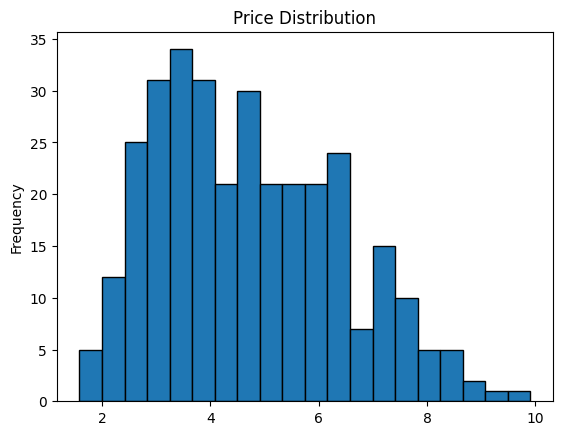

In [8]:
print(df["Price [lacs]"].describe())
df["Price [lacs]"].plot(kind="hist", bins=20, title="Price Distribution", edgecolor="black");

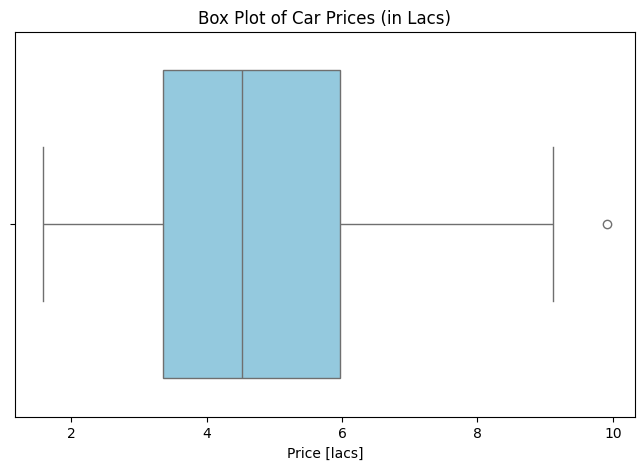

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Price [lacs]"], color="skyblue")
plt.title("Box Plot of Car Prices (in Lacs)")
plt.xlabel("Price [lacs]")
plt.show()

**Analysis:**
* Most cars fall between ₹3.37 and ₹5.97 lacs.
* The histogram and box plot likely show a slight right skew, with a few high-priced outliers pulling the mean upward.
* The lower bound (₹1.58 lacs) may include older or high-mileage vehicles.
* The upper bound (₹9.91 lacs) could represent newer models




### 2. Fuel Type

Fuel Type
Petrol    0.791925
Diesel    0.208075
Name: proportion, dtype: float64


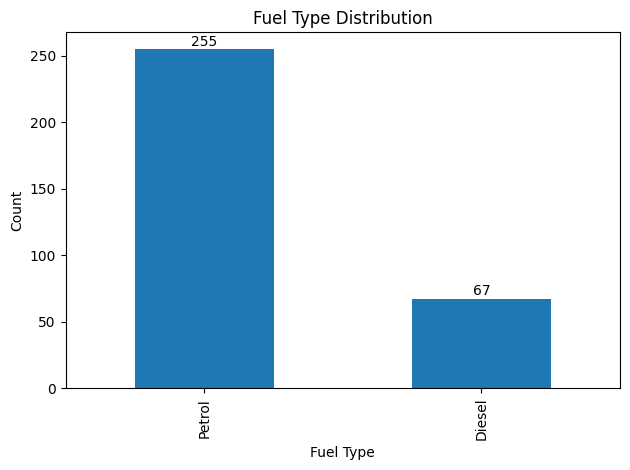

In [10]:
print(df["Fuel Type"].value_counts(normalize  = True))
ax = df["Fuel Type"].value_counts().plot(kind="bar", title="Fuel Type Distribution")

annotate_each_bar(ax)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


- **Petrol** dominates the dataset, making up ~79% of all listings. This suggests that petrol vehicles are far more common in our sample—likely due to lower upfront costs, wider availability, or regional fuel preferences.
- **Diesel** cars account for only ~21%, which could reflect:
    - A shift in consumer preference away from diesel 
    - Fewer diesel variants offered by manufacturers like Renault


### 3. Transmission

Transmission
Manual       0.60559
Automatic    0.39441
Name: proportion, dtype: float64


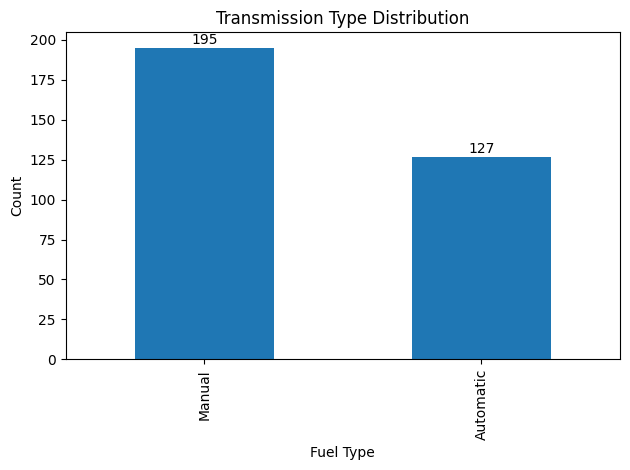

''

In [11]:
print(df["Transmission"].value_counts(normalize = True))
ax = df["Transmission"].value_counts().plot(kind="bar", title="Transmission Type Distribution", ylabel = 'Frequency')

annotate_each_bar(ax)

plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
;

- **Manual cars** dominate the dataset, making up ~60% of listings. This likely reflects:
    - Greater availability of manual variants in budget and mid-range segments
    - Regional driving preferences or cost-conscious buyers who prefer manual transmissions
- **Automatic cars** account for ~40%, which is still a sizable share. This suggests:
    - Growing demand for convenience.
    - Higher likelihood of newer models.
      


### 4. Kilometers Driven

count       322.000000
mean      56562.307453
std       41382.534882
min        1248.000000
25%       28050.500000
50%       47304.000000
75%       76217.750000
max      262015.000000
Name: Kilometers Driven, dtype: float64


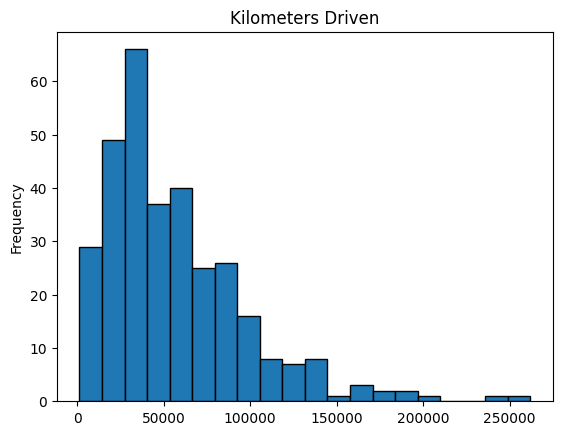

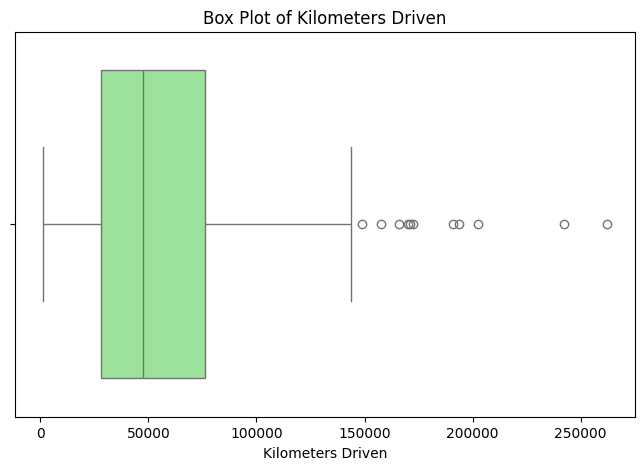

In [12]:
print(df["Kilometers Driven"].describe())
ax=df["Kilometers Driven"].plot(kind="hist", bins=20, title="Kilometers Driven", edgecolor="black", ylabel = "Frequency")
plt.figure(figsize=(8, 5))
#annotate_each_bar(ax)
sns.boxplot(x=(df["Kilometers Driven"]), color="lightgreen")

plt.title("Box Plot of Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.show();

- Median ~47,304 km—lower than the mean, a right-skewed distribution (a few ultra-high mileage cars pulling the average up).
- Most cars fall between 28k and 76k km, which is a healthy mid-life range.
- There are outliers—especially on the high end.
- Mileage likely correlates with price, owner count, and car age



### 5. Owner

Owner
1    0.642857
2    0.279503
3    0.074534
4    0.003106
Name: proportion, dtype: float64


''

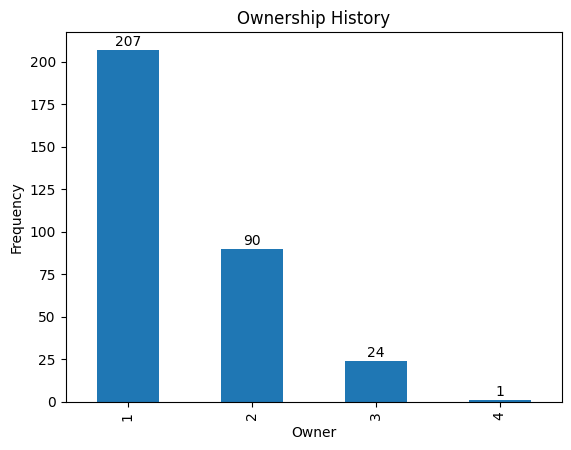

In [13]:
print(df["Owner"].value_counts(normalize = True))
ax = df["Owner"].value_counts().sort_index().plot(kind="bar", title="Ownership History", ylabel = 'Frequency')
annotate_each_bar(ax)
;

- **1st Owner** cars dominate the dataset, making up ~64% of listings. This suggests:
    - Most sellers are original owners, which often implies better maintenance and documentation.
    - Buyers may prefer 1st-owner vehicles due to perceived reliability and resale value.
- **2nd Owner** cars account for ~28%, a sizable secondary market. These may:
    - Be slightly older or higher mileage.
    - Still retain decent value if well-maintained.
- **3rd Owner** cars drop to ~ 7%, and 4th Owner listings are extremely rare (~0.3%). These often:
    - Indicate older vehicles with more wear.
    - May be priced lower but come with higher risk or maintenance needs.


### 6. Car Age & Make Year

In [14]:
df['Make Year'].value_counts()

Make Year
2021    49
2017    41
2018    40
2022    34
2020    30
2019    26
2016    26
2023    24
2014    13
2013    13
2015    11
2012     8
2024     7
Name: count, dtype: int64

count    322.000000
mean       6.254658
std        2.989659
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       13.000000
Name: Car Age, dtype: float64


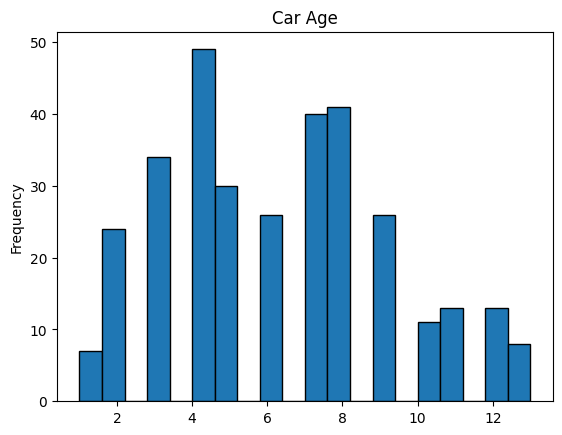

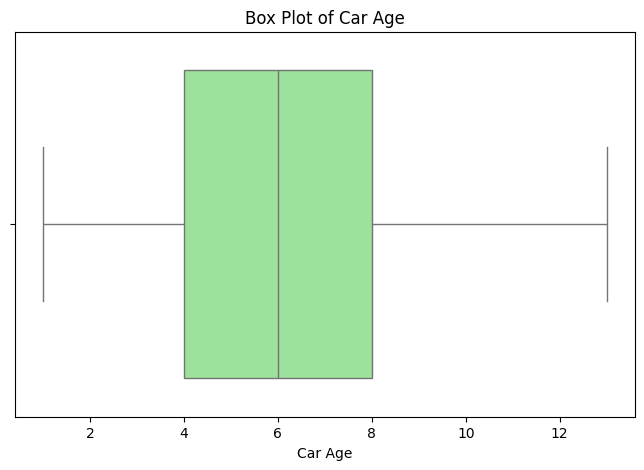

In [15]:
print(df["Car Age"].describe())
df["Car Age"].plot(kind="hist", bins=20, title="Car Age", edgecolor="black", ylabel = "Frequency")
plt.figure(figsize=(8, 5))
sns.boxplot(x=(df["Car Age"]), color="lightgreen")
plt.title("Box Plot of Car Age")
plt.xlabel("Car Age")
plt.show();

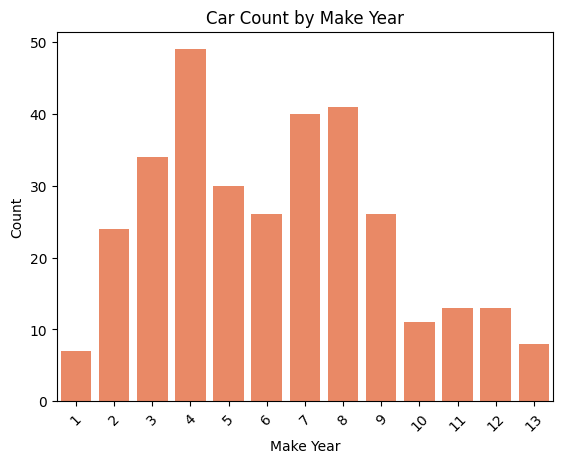

In [16]:
sns.countplot(x=df["Car Age"], color="coral")
plt.xticks(rotation=45)
plt.title("Car Count by Make Year")
plt.xlabel("Make Year")
plt.ylabel("Count")
plt.show()

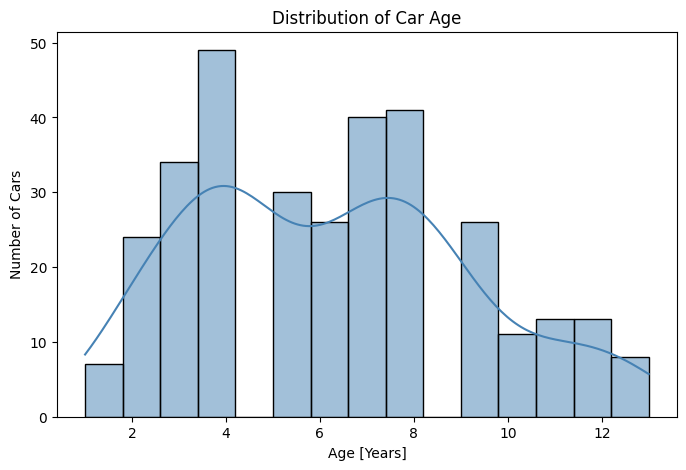

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Car Age"], bins=15, kde=True, color="steelblue")
plt.title("Distribution of Car Age")
plt.xlabel("Age [Years]")
plt.ylabel("Number of Cars")
plt.show()

- Distribution is fairly symmetric.
- Most cars fall between 4 and 8 years, which is the sweet spot for affordability vs reliability.


### 7. Car Model

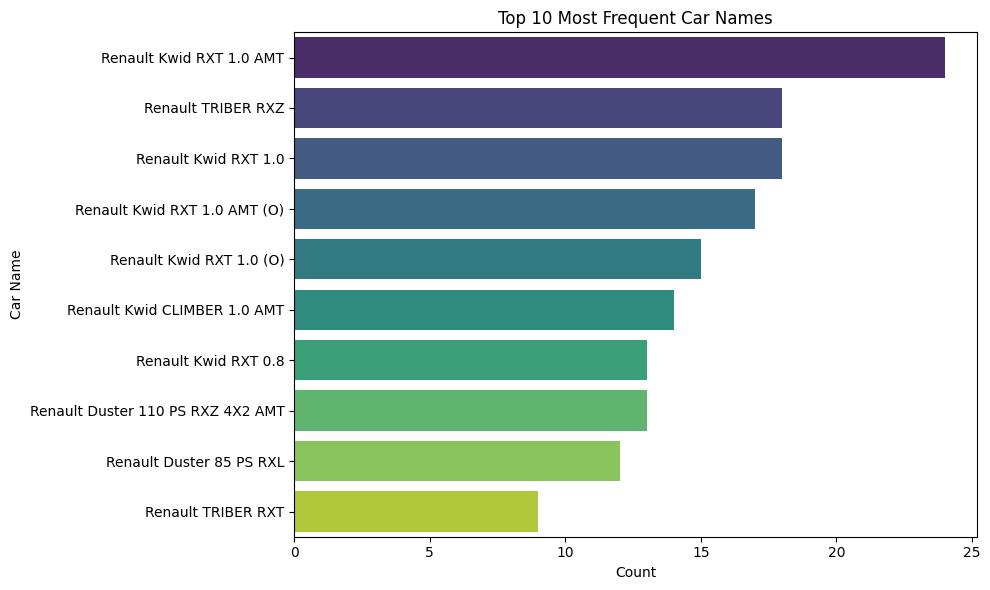

In [18]:
top_names = df["Name"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_names.values, y=top_names.index, palette="viridis")
plt.title("Top 10 Most Frequent Car Names")
plt.xlabel("Count")
plt.ylabel("Car Name")
plt.tight_layout()
plt.show();


### 8. Car Locations

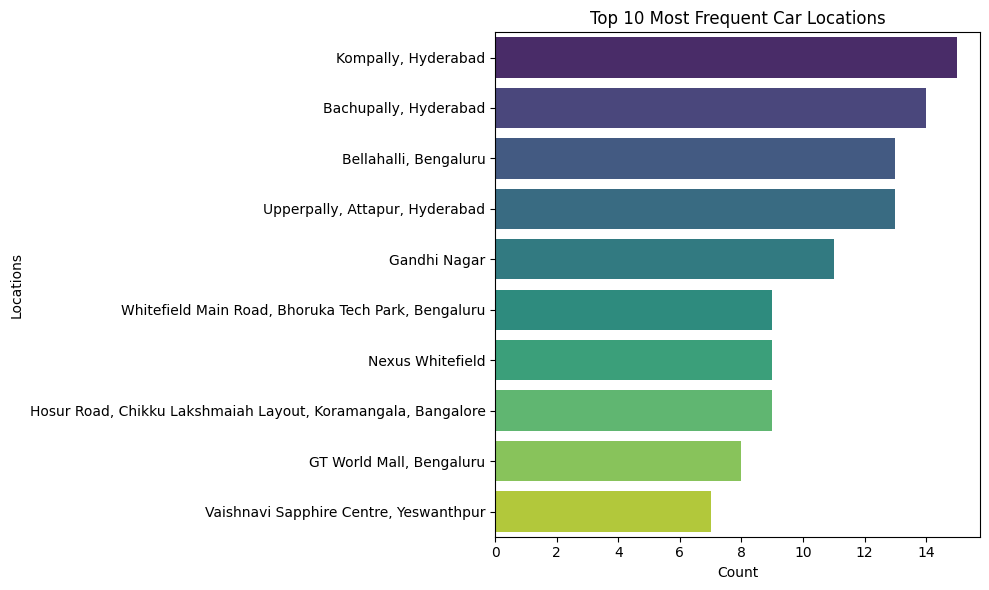

In [19]:
top_locations = df["location"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title("Top 10 Most Frequent Car Locations")
plt.xlabel("Count")
plt.ylabel("Locations")
plt.tight_layout()
plt.show();

### Key Insights


- Most cars price fall between **₹3.37 and ₹5.97** lacs.
- Most cars fall between **28k and 76k km** driven, which is a healthy mid-life range.
- **Manual cars** dominate the dataset, making up ~60% of listings
- **1st Owner** cars dominate the dataset, making up ~64% of listings which often implies better maintenance and documentation.
- Most cars fall between **4 and 8 years**, which is the sweet spot for affordability vs reliability.
- **Petrol** dominates the dataset, making up ~79% of all listings.

## BiVariate Analysis

### Price vs Car Age

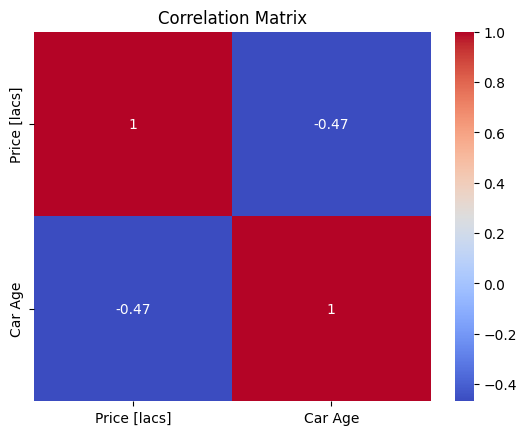

In [20]:
corr = df[["Price [lacs]", "Car Age"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1000x600 with 0 Axes>

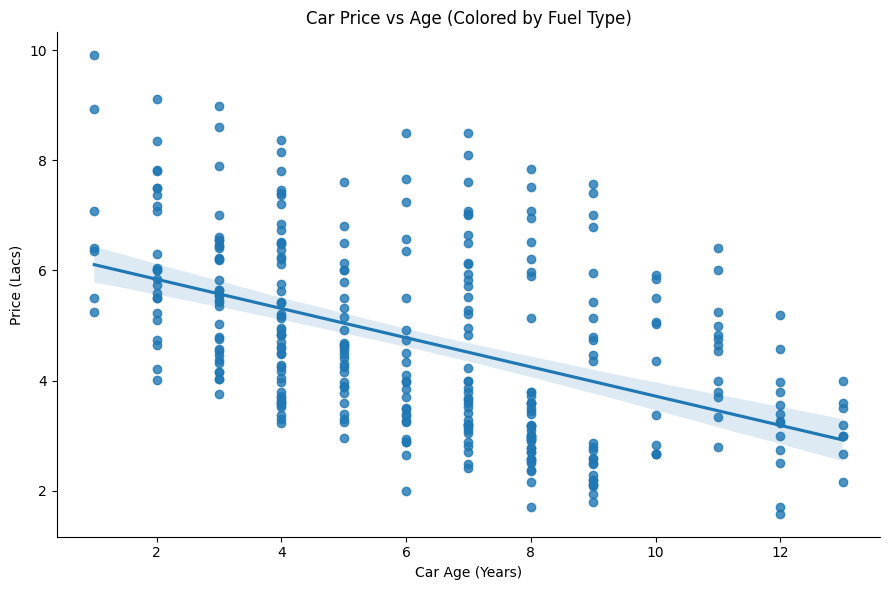

In [21]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x="Car Age", y="Price [lacs]",  height=6, aspect=1.5)
plt.title("Car Price vs Age (Colored by Fuel Type)")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price (Lacs)")
plt.tight_layout()
plt.show()

### Price Vs Transmission

In [22]:
price_trans = df.groupby("Transmission")["Price [lacs]"].mean()
price_trans

Transmission
Automatic    5.133622
Manual       4.436821
Name: Price [lacs], dtype: float64

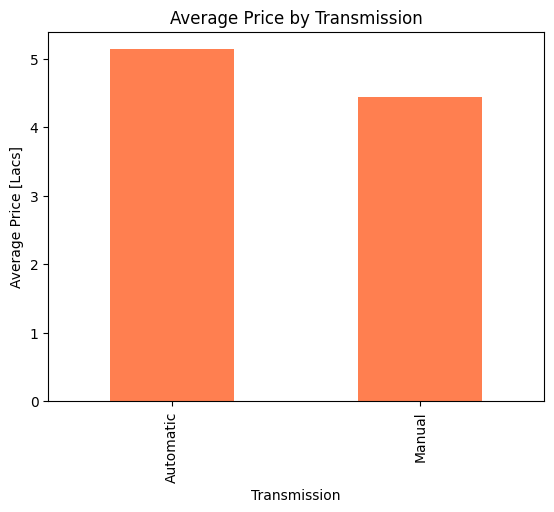

In [23]:
price_trans.plot(kind="bar", title="Average Price by Transmission",ylabel = 'Average Price [Lacs]', color="coral");


### Price vs Fuel Type

In [24]:
price_fuel = df.groupby("Fuel Type")["Price [lacs]"].mean()
price_fuel

Fuel Type
Diesel    5.087164
Petrol    4.612980
Name: Price [lacs], dtype: float64

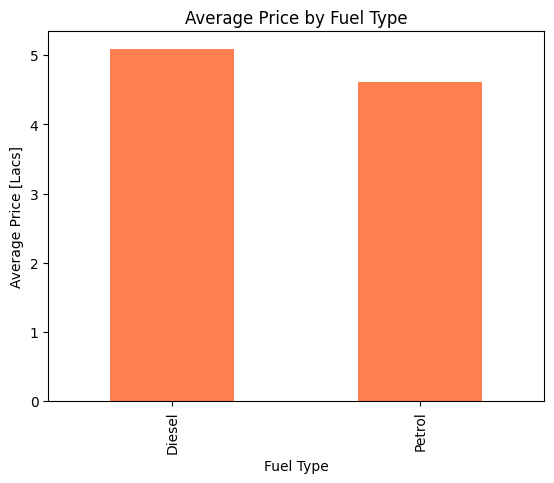

In [25]:
price_fuel.plot(kind="bar", title="Average Price by Fuel Type",ylabel = 'Average Price [Lacs]', color="coral");

### Price Vs OwnerShip

In [26]:
price_owner = df.groupby("Owner")["Price [lacs]"].mean()
price_owner

Owner
1    5.090242
2    4.242333
3    3.321667
4    1.940000
Name: Price [lacs], dtype: float64

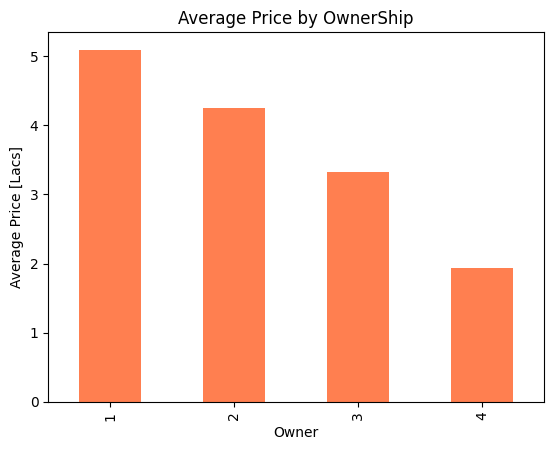

In [27]:
price_owner.plot(kind="bar", title="Average Price by OwnerShip", ylabel = 'Average Price [Lacs]',color="coral");

## Insights
- Price is depricating over the years, Older cars are cheaper.
- **Diesel cars** are comparetivly expensive that might be Diesel variants often come with larger engines or higher trims
- **Manual cars** are cheaper than **automatic cars** that might be
    - Higher demand for automatics in urban areas
    - Premium features often bundled with automatic variants
- **First-owner** cars retain the most value, often with better maintenance and documentation.


## MultiVariate Analysis

### Price Depreciation

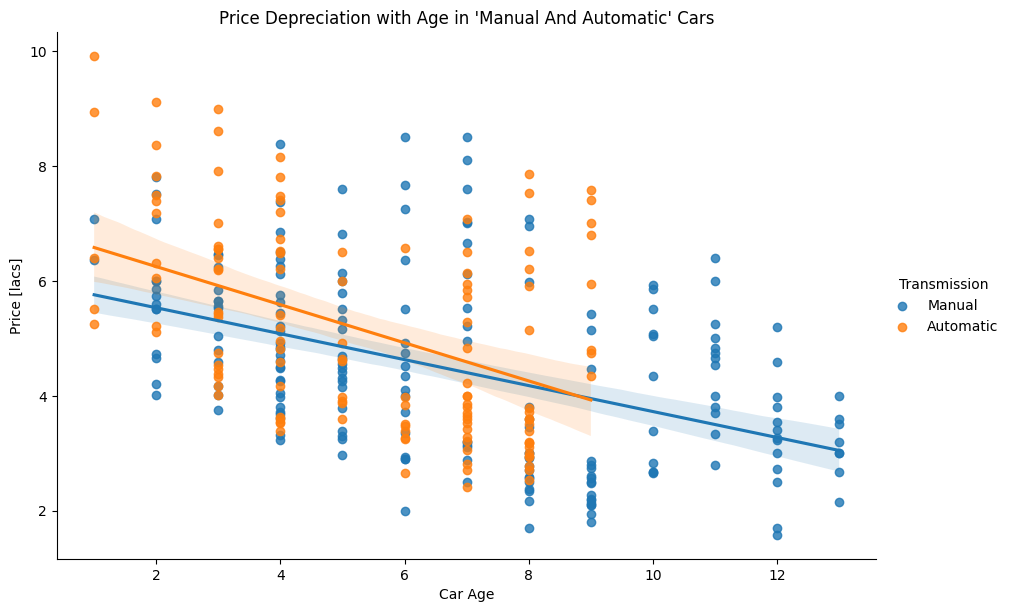

In [28]:
sns.lmplot(data=df, x="Car Age", y="Price [lacs]", hue="Transmission", height=6, aspect=1.5)
plt.title("Price Depreciation with Age in 'Manual And Automatic' Cars");

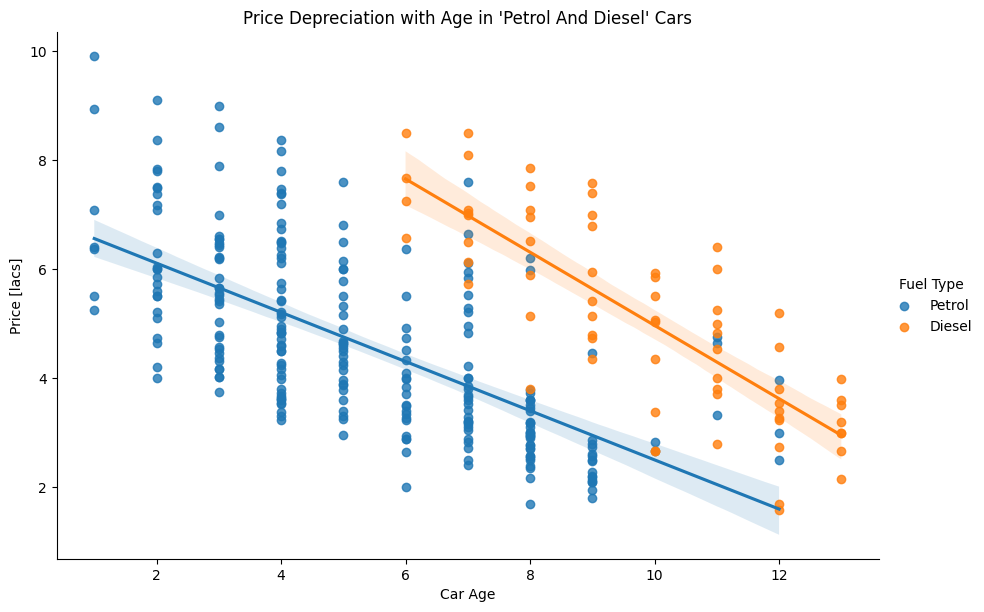

In [29]:
sns.lmplot(data=df, x="Car Age", y="Price [lacs]", hue="Fuel Type", height=6, aspect=1.5)
plt.title("Price Depreciation with Age in 'Petrol And Diesel' Cars");

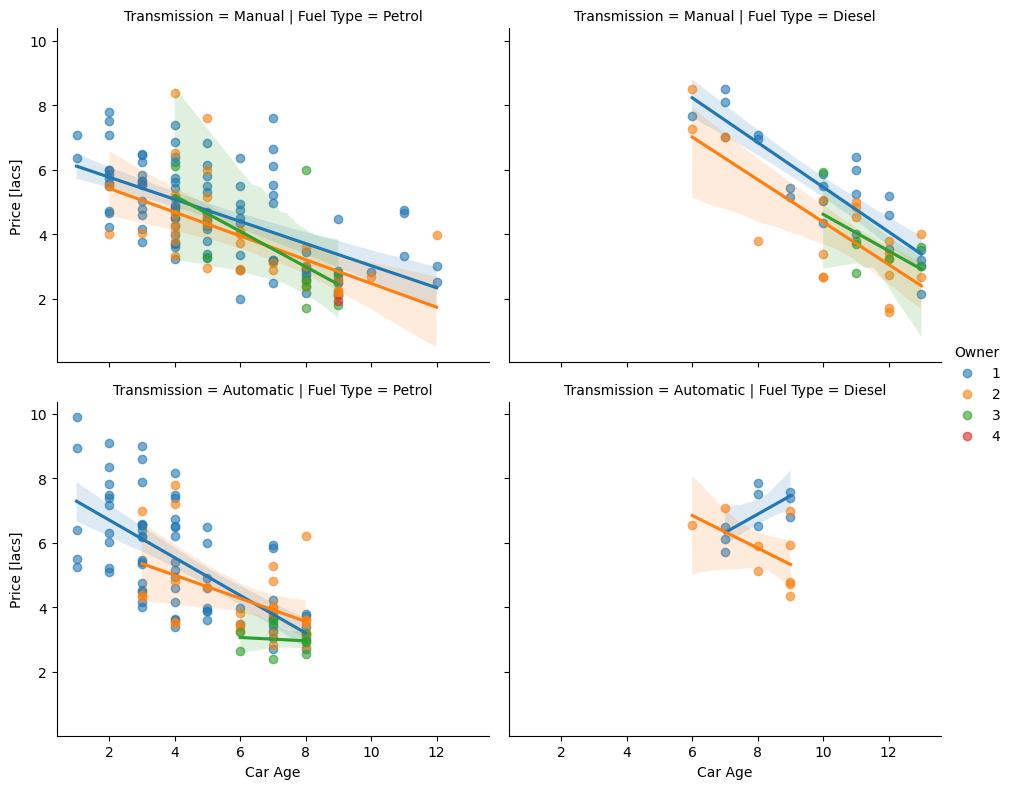

In [30]:
g=sns.lmplot(
    data=df,
    x="Car Age",
    y="Price [lacs]",
    col="Fuel Type",
    row="Transmission",
    hue="Owner",
    height=4,
    aspect=1.2,
    scatter_kws={"alpha": 0.6}
)
g.savefig("car_price_lmplot.png", dpi=300)


## Key Insights:

- Price is depricating over the years, Older cars are cheaper.
- Price depreciation is faster in Diesel cars compared to Petrol cars.
- Manual cars are losing their value slower than automatic cars.
- Best choice is cars with 1 or 2 previous Owners

# Suggestions for Buyers

Prefer 
- Cars 4 to 8 years old if you are looking for **Affordability and Reliability**
- Petrol over diesel:
    -  Latest **Diesel** car variant is 6 years old and price depreciation is steeper in Diesel cars.
- Manual vs Automatic:
    -  **Premium features** are bundled with **automatic cars** but comes with a steeper price deprecation.
    -  **Manual Cars** are more budget friendly with slower price depreciation. 
- Cars with First owners. **Better Documentaion and well Maintained**